# Data Science Bowl 2019 EDA
## Uncover the factors to help measure how young children learn

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! ls ../input/data-science-bowl-2019/

sample_submission.csv  specs.csv  test.csv  train.csv  train_labels.csv


## Load Data

Quick reminder of what the columns mean from the [description of the competition](https://www.kaggle.com/c/data-science-bowl-2019):

__train.csv:__
_Gameplay events._

* `event_id` - Randomly generated unique identifier for the event type. Maps to `event_id` column in specs table.
* `game_session` - Randomly generated unique identifier grouping events within a single game or video play session.
* `timestamp` - Client-generated datetime
* `event_data` - Semi-structured JSON formatted string containing the events parameters. Default fields are: `event_count`, `event_code`, and `game_time`; otherwise fields are determined by the event type.
* `installation_id` - Randomly generated unique identifier grouping game sessions within a single installed application instance.
* `event_count` - Incremental counter of events within a game session (offset at 1). Extracted from event_data.
* `event_code` - Identifier of the event 'class'. Unique per game, but may be duplicated across games. E.g. event code '2000' always identifies the 'Start Game' event for all games. Extracted from event_data.
* `game_time` - Time in milliseconds since the start of the game session. Extracted from event_data.
* `title` - Title of the game or video.
* `type` - Media type of the game or video. Possible values are: `Game`, `Assessment`, `Activity`, `Clip`.
* `world` - The section of the application the game or video belongs to. Helpful to identify the educational curriculum goals of the media. Possible values are: `NONE` (at the app's start screen), `TREETOPCITY` (Length/Height), `MAGMAPEAK` (Capacity/Displacement), `CRYSTALCAVES` (Weight).

__specs.csv:__
_Specification of the various event types._

* `event_id` - Global unique identifier for the event type. Joins to `event_id` column in events table.
* `info` - Description of the event.
* `args` - JSON formatted string of event arguments. Each argument contains:
    * `name` - Argument name.
    * `type` - Type of the argument (string, int, number, object, array).
    * `info` - Description of the argument.

In [3]:
INPUT_PATH = '../input/data-science-bowl-2019/'
train = pd.read_csv(INPUT_PATH + 'train.csv')
test = pd.read_csv(INPUT_PATH + 'test.csv')
specs = pd.read_csv(INPUT_PATH + 'specs.csv')
labels = pd.read_csv(INPUT_PATH + 'train_labels.csv')

In [4]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [5]:
test.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [6]:
specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [7]:
labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


## Explore the Datasets

`1` Explore the number of rows in train and test sets:

In [8]:
train_rows = len(train)
test_rows = len(test)

print('The number of rows in the train set is {}'.format(train_rows))
print('The number of rows in the test set is {}'.format(test_rows))

The number of rows in the train set is 11341042
The number of rows in the test set is 1156414


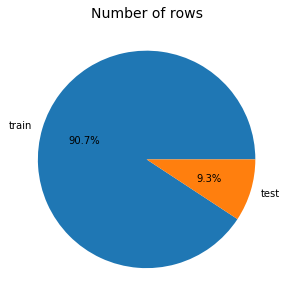

In [9]:
plt.figure(figsize=(5,5))
plt.pie([train_rows, test_rows], labels = ['train', 'test'], autopct='%1.1f%%')
plt.title('Number of rows', fontsize = 14)
plt.show()

We have a large train set which is almost 10 times greater than the test set.

`2` Explore the users by `installation_id`s:

In [10]:
inst_train = train.installation_id.unique()
inst_test = test.installation_id.unique()

print('Number of players in the train set is {}'.format(len(inst_train)))
print('Number of players in the test set is {}'.format(len(inst_test)))

Number of players in the train set is 17000
Number of players in the test set is 1000


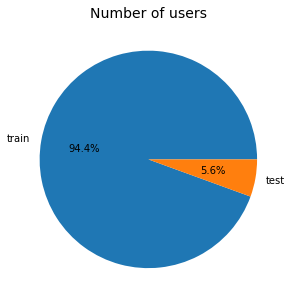

In [11]:
plt.figure(figsize=(5,5))
plt.pie([len(inst_train), len(inst_test)], labels = ['train', 'test'], autopct='%1.1f%%')
plt.title('Number of users', fontsize = 14)
plt.show()

Overlapping users between train and test sets:

In [12]:
common_users = list(set(inst_train).intersection(set(inst_test)))
common_users

[]

The number of users who took an assessment at least once:

In [13]:
assm_event_code = 4100
bird_assm_event_code = 4110

users_assm_train = train[(train.event_code == assm_event_code) | (train.event_code == bird_assm_event_code)].installation_id.unique()
users_assm_test = test[(test.event_code == assm_event_code) | (test.event_code == bird_assm_event_code)].installation_id.unique()

print('Number of players in the train set who took at least one assessment is {}'.format(len(users_assm_train)))
print('Number of players in the test set who took at least one assessment is {}'.format(len(users_assm_test)))

Number of players in the train set who took at least one assessment is 4248
Number of players in the test set who took at least one assessment is 582


Number of events per user:

In [28]:
train_user_events = train['installation_id'].value_counts()
test_user_events = test['installation_id'].value_counts()

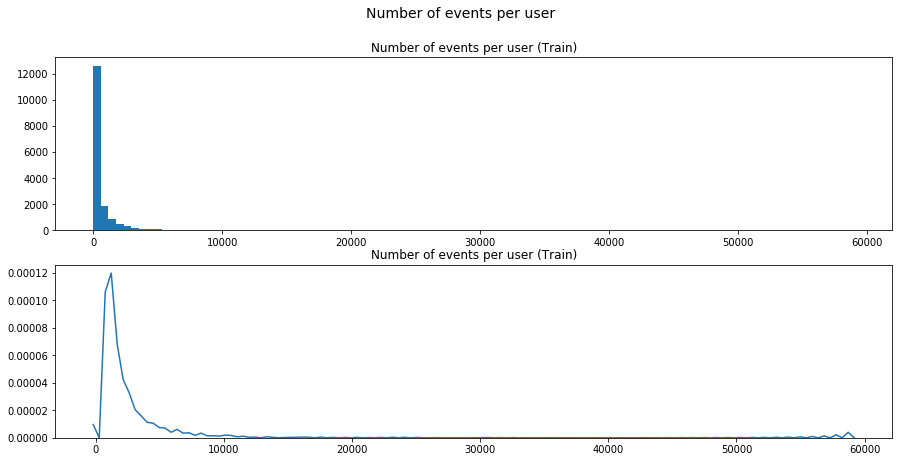

In [33]:
fig, axs = plt.subplots(2, 1, figsize = (15,7))

axs[0].hist(train_user_events.values, bins = 100)
axs[0].set_title('Number of events per user (Train)')

axs[1] = sns.kdeplot(train_user_events.values)
axs[1].set_title('Number of events per user (Train)')

plt.suptitle('Number of events per user', fontsize = 14)
plt.show()

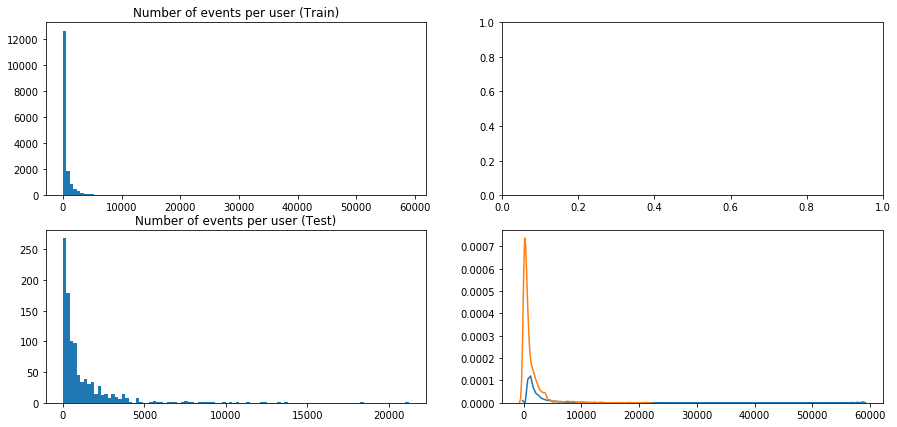

In [34]:
fig, axs = plt.subplots(2, 1, figsize = (15,7))

axs[0].hist(test_user_events.values, bins = 100)
axs[0].set_title('Number of events per user (Test)')

axs[1] = sns.kdeplot(test_user_events.values)
axs[1].set_title('Number of events per user (Test)')

plt.suptitle('Number of events per user', fontsize = 14)
plt.show()